In [15]:
import os
os.makedirs("results", exist_ok=True)

In [3]:
testasTestast = "Hello guys welcome to my  youtube channel"

In [4]:
from datasets import load_dataset

datasubset = load_dataset("json", data_files="clean.json")

fprintfirstDataElement = True

if fprintfirstDataElement:
    print(datasubset['train']['training_data'][0]['name'][0])
    print(datasubset['train']['training_data'][0]['label'][0])

07282016HFUUforum_SLASH_07-28-2016_HFUUforum_DOT_mp3_00000.flac
i wanted this to share a few things but i'm going to not share as much as i wanted to share because we are starting late i'd like to get this thing going so we all get home at a decent hour this this election is very important to


In [5]:
testasTestast = datasubset['train']['training_data'][0]['label'][0]

In [6]:
# SpeechT5
import os
modelName = "SpeechT5"
os.makedirs("results/{modelName}", exist_ok=True)


from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech
from scipy.io.wavfile import write
from datasets import load_dataset
import torch

from transformers import SpeechT5HifiGan

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

inputs = processor(text=testasTestast, return_tensors="pt")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

output_waveform = speech.squeeze().cpu().numpy()
write("output.wav", 16000, output_waveform)

from IPython.display import Audio

Audio(speech, rate=16000)

In [7]:
from transformers import VitsModel, AutoTokenizer
import torch
from scipy.io.wavfile import write

model = VitsModel.from_pretrained("facebook/mms-tts-eng")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-eng")

text = testasTestast
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    output = model(**inputs).waveform

output_waveform = output.squeeze().cpu().numpy()
write("output.wav", 16000, output_waveform)

from IPython.display import Audio

Audio(output, rate=16000)


Some weights of the model checkpoint at facebook/mms-tts-eng were not used when initializing VitsModel: ['flow.flows.0.wavenet.in_layers.0.weight_g', 'flow.flows.0.wavenet.in_layers.0.weight_v', 'flow.flows.0.wavenet.in_layers.1.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.0.wavenet.in_layers.2.weight_g', 'flow.flows.0.wavenet.in_layers.2.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_g', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'flow.flows.0.wavenet.res_skip_layers.0.weight_g', 'flow.flows.0.wavenet.res_skip_layers.0.weight_v', 'flow.flows.0.wavenet.res_skip_layers.1.weight_g', 'flow.flows.0.wavenet.res_skip_layers.1.weight_v', 'flow.flows.0.wavenet.res_skip_layers.2.weight_g', 'flow.flows.0.wavenet.res_skip_layers.2.weight_v', 'flow.flows.0.wavenet.res_skip_layers.3.weight_g', 'flow.flows.0.wavenet.res_skip_layers.3.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_g', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'flow.flows.1.wavenet.in_layers.1.wei

In [8]:
speech.shape

torch.Size([304640])

In [9]:
output.shape

torch.Size([1, 226048])

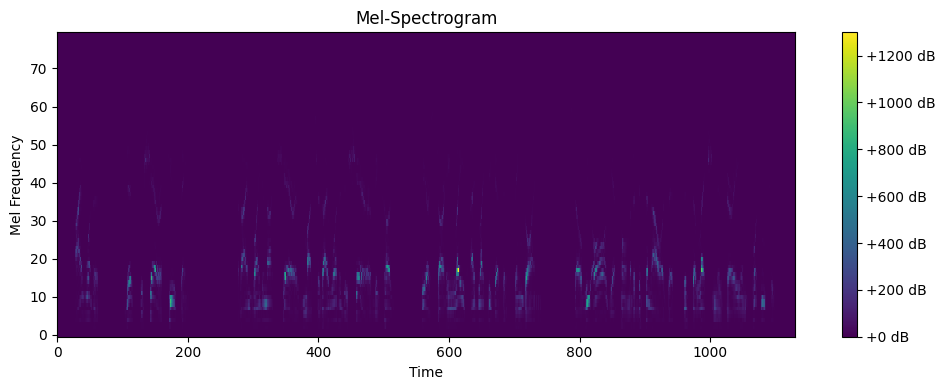

In [10]:
import torchaudio.transforms as transforms
import torch
import matplotlib.pyplot as plt

# Example text-to-sequence preprocessing
def text_to_sequence(text, text_processor):
    return text_processor(text)

# Example audio-to-Mel-spectrogram preprocessing
def audio_to_mel_spectrogram(audio, sample_rate):
    transform = transforms.MelSpectrogram(sample_rate=sample_rate, n_mels=80)
    return transform(audio)



# Generate Mel-spectrogram
mel_spectrogram = audio_to_mel_spectrogram(output, 16000)

# Convert to NumPy for plotting
mel_spectrogram_np = mel_spectrogram.squeeze().detach().cpu().numpy()

# Plotting the Mel-spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_np, aspect='auto', origin='lower', interpolation='none')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.tight_layout()

In [11]:
import soundfile as sf
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import argparse

def parse_transcription(wav_file):
    # load pretrained model
    processor = Wav2Vec2Processor.from_pretrained("addy88/wav2vec2-english-stt")
    model = Wav2Vec2ForCTC.from_pretrained("addy88/wav2vec2-english-stt")
    # load audio
    audio_input, sample_rate = sf.read(wav_file)
    # pad input values and return pt tensor
    input_values = processor(audio_input, sampling_rate=16000, return_tensors="pt").input_values
    # INFERENCE
    # retrieve logits & take argmax
    logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    # transcribe
    transcription = processor.decode(predicted_ids[0], skip_special_tokens=True)
    print(transcription)


In [12]:
parse_transcription(r'C:\CodeProjects\University\3.2_VU\deep learning\gmmGroup\k3s2_gmmGroup\output.wav')

Some weights of the model checkpoint at addy88/wav2vec2-english-stt were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at addy88/wav2vec2-english-stt and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model 

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (c:\Users\dauma\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\internal\__init__.py)

In [ ]:
# Iterate through the test dataset
for input, ground_truth in test_dataset:
    # Get the model's output
    output = model(input)

    # Convert tensors to numpy arrays if necessary
    if isinstance(output, torch.Tensor):
        output = output.detach().cpu().numpy()
    if isinstance(ground_truth, torch.Tensor):
        ground_truth = ground_truth.detach().cpu().numpy()

    # Calculate the STOI score between the output and ground truth
    score = stoi(ground_truth, output, 16000)  # Assuming a sample rate of 16kHz
    stoi_scores.append(score)

# Calculate the average STOI score
average_stoi = sum(stoi_scores) / len(stoi_scores)
print(f"Average STOI Score: {average_stoi}")

NameError: name 'test_dataset' is not defined